Imports

In [1]:
from pynq import Overlay
from pynq import allocate
import numpy as np
from mnist_driver import MNISTDriver
import time
from matplotlib import pyplot as plt

Load the overlay

In [2]:
ol = Overlay("/home/xilinx/pynq/overlays/mnist/mnist.bit")
hw = ol.mnist

Initial control register:  4
Updated control register:  129


Import the MNIST dataset

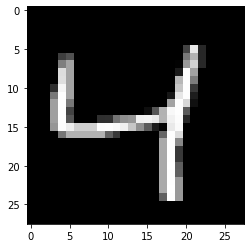

In [3]:
IMAGE_CHOSEN = 2
with open('mnist_images.npy', 'rb') as f:
    images = np.load(f)
plt.imshow(images[IMAGE_CHOSEN], cmap='gray')
plt.show()

Run inference using the HW accelerator

In [4]:
result = allocate(shape=((10,)), dtype=np.uint8)
hw.inference(images[IMAGE_CHOSEN], result)
print(np.argmax(result))
print(result)

RuntimeError: DMA Internal Error (transfer length 0?)